In [39]:
from dotenv import load_dotenv
load_dotenv()

True

In [40]:
from langchain_ollama import ChatOllama
llm = ChatOllama(model="llama3.2")

In [41]:
# tools

class Book:

  def __init__(self, title, author, personal_desc=""):
    self.title = title
    self.author = author
    self.personal_desc = personal_desc
  
  @property
  def __dict__(self):
    return {key: value for key, value in self.__dict__.items()}
  
  def print_book(self):
    "this is a book object"

def create_book(title: str, author: str) -> Book:
  """When title and author is given, create a book object. If there is no specific book title or author, do not run this tool

  Args:
      title: title of the book
      author: author of the book

  Returns:
      Book: Book object that contains title, author and personal book description
  """
  book = Book(title, author, "this is my personal book description")
  return book

def multiply(a: int, b: int) -> int:
  """multiply a and b

  Args:
      a: the first integer
      b: the second integer

  Returns:
      int: the result of multiplication of a and b
  """
  return a * b

llm_with_tool = llm.bind_tools([create_book, multiply])

In [42]:
# state
from langgraph.graph import MessagesState

class MyMessagesState(MessagesState):
  pass

In [43]:
# node
def tool_calling_llm(state):
  return {
    "messages": [llm_with_tool.invoke(state['messages'])]
  }
  


In [44]:
# grraph building
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode, tools_condition

builder = StateGraph(MyMessagesState)

builder.add_node("tool_llm", tool_calling_llm)
builder.add_node("tools", ToolNode([create_book, multiply]))
builder.add_edge(START, "tool_llm")
builder.add_conditional_edges("tool_llm", tools_condition)
builder.add_edge('tools', END)

graph = builder.compile()


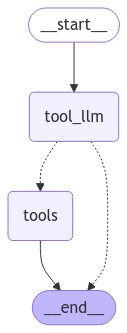

In [45]:
from IPython.display import display, Image

display(Image(graph.get_graph().draw_mermaid_png()))

In [46]:
from langchain_core.messages import HumanMessage
orig_state = {
  "messages": [HumanMessage(content="This is book for 'the rosie project' by 'Geralt of Rivia'")]
}

response = graph.invoke(orig_state)

In [47]:
from langchain_core.messages import ToolMessage

for m in response['messages']:
  print(m)
  print("---" * 25)
  if isinstance(m, ToolMessage):
    book = m.content


content="This is book for 'the rosie project' by 'Geralt of Rivia'" additional_kwargs={} response_metadata={} id='e18390b9-a546-4c65-9477-7d7c07763e79'
---------------------------------------------------------------------------
content='' additional_kwargs={} response_metadata={'model': 'llama3.2', 'created_at': '2024-10-25T01:17:05.8351373Z', 'message': {'role': 'assistant', 'content': '', 'tool_calls': [{'function': {'name': 'create_book', 'arguments': {'author': 'Geralt of Rivia', 'title': 'the rosie project'}}}]}, 'done_reason': 'stop', 'done': True, 'total_duration': 694192500, 'load_duration': 45811400, 'prompt_eval_count': 268, 'prompt_eval_duration': 27711000, 'eval_count': 30, 'eval_duration': 608788000} id='run-74e5de92-fbd8-42c1-b8c8-76ef72830070-0' tool_calls=[{'name': 'create_book', 'args': {'author': 'Geralt of Rivia', 'title': 'the rosie project'}, 'id': '4a229e21-f16e-4904-9d04-b3dfeade9e10', 'type': 'tool_call'}] usage_metadata={'input_tokens': 268, 'output_tokens': 30

In [52]:
response

{'messages': [HumanMessage(content="This is book for 'the rosie project' by 'Geralt of Rivia'", additional_kwargs={}, response_metadata={}, id='e18390b9-a546-4c65-9477-7d7c07763e79'),
  AIMessage(content='', additional_kwargs={}, response_metadata={'model': 'llama3.2', 'created_at': '2024-10-25T01:17:05.8351373Z', 'message': {'role': 'assistant', 'content': '', 'tool_calls': [{'function': {'name': 'create_book', 'arguments': {'author': 'Geralt of Rivia', 'title': 'the rosie project'}}}]}, 'done_reason': 'stop', 'done': True, 'total_duration': 694192500, 'load_duration': 45811400, 'prompt_eval_count': 268, 'prompt_eval_duration': 27711000, 'eval_count': 30, 'eval_duration': 608788000}, id='run-74e5de92-fbd8-42c1-b8c8-76ef72830070-0', tool_calls=[{'name': 'create_book', 'args': {'author': 'Geralt of Rivia', 'title': 'the rosie project'}, 'id': '4a229e21-f16e-4904-9d04-b3dfeade9e10', 'type': 'tool_call'}], usage_metadata={'input_tokens': 268, 'output_tokens': 30, 'total_tokens': 298}),
  